In [1]:
#!/bin/usr/env python
import os
import scipy
from scipy import ndimage, misc, signal
import skimage
from skimage import img_as_ubyte
import numpy as np
import matplotlib.image as mpimg #image reader
import matplotlib.pyplot as plt
import matplotlib.cm as cm #colors

In [2]:
data_dir='/home/leasanspy/Dropbox/RA_Fermilab/Lenses_DataSet/CASSOWARY/cassowary_download/' #location of data
#getting image
file_name='obj_ra120.05441848_dec8.20232396'
image_file=data_dir+file_name
img = mpimg.imread(image_file)

In [3]:
#you should use float 32 or something better or you will get NaN values.
fil_sig=signal.wiener(img.astype('float64'), mysize=None, noise=None) #filter signal

In [4]:
print(type(img[0,0,0]))
print(type(fil_sig[0,0,0]))

<class 'numpy.uint8'>
<class 'numpy.float64'>


# Image normalization
The signal needs to be normalize in order to keep the range between zero and 255. An it needs to be rounded before converted to uint8 format.

In [5]:
fil_sig=255*(fil_sig-fil_sig.min())/(fil_sig.max()-fil_sig.min())
fil_sig=fil_sig.round()
fil_sig=fil_sig.astype(np.uint8)

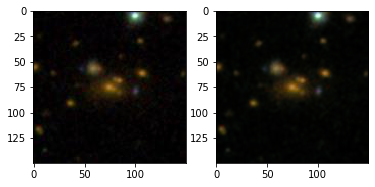

In [6]:
fig_t, axs_t = plt.subplots(1,2)
axs_t[0].imshow(img)
axs_t[1].imshow(fil_sig)

In [9]:
print(fil_sig.shape)

(150, 150, 3)


In [ ]:
np.save('output_notebook',fil_sig)

In [ ]:
current_dir=os.getcwd()
load_dir=current_dir+'/output_notebook.npy'
load_num=np.load(load_dir)
plt.imshow(fil_sig)